In [5]:
import cv2
import imutils
import numpy as np
import math
from PIL import Image
from google.colab.patches import cv2_imshow

In [7]:
# Param
max_size = 10000
min_size = 900

# Load image
img = cv2.imread('/content/drive/MyDrive/DoAnNganh/dataset/0000_05696_b.jpg', cv2.IMREAD_COLOR)
imggoc = Image.open('/content/drive/MyDrive/DoAnNganh/dataset/0000_05696_b.jpg')
# Resize image!
img = cv2.resize(img, (500, 350))
img1 = imggoc.resize((500, 350))


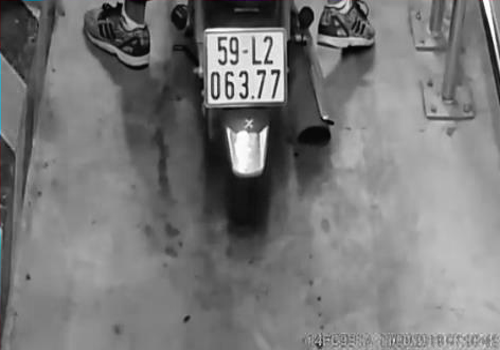

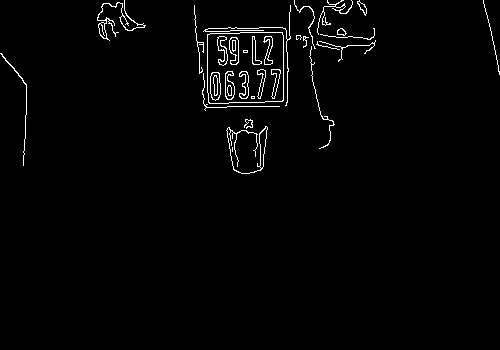

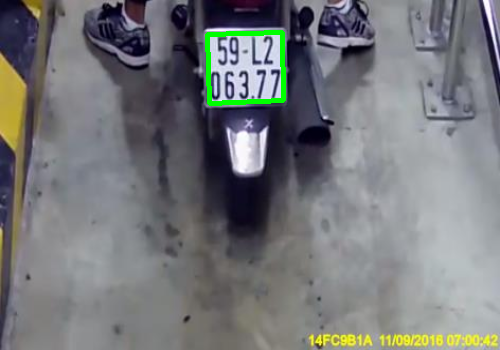

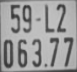

In [8]:
# Edge detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grey scale
gray = cv2.bilateralFilter(gray, 100, 75, 75)  # Blur to reduce noise
Width, Height = img1.size
Sx=np.array([[-1, -2,-1],

             [ 0, 0, 0],

             [1, 2, 1]])

Sy=np.array([[-1, 0, 1], [-2, 0, 2],

[-1, 0, 1]])

DO=200
aR=aG=aB=0


Lightness=img1.convert()

def find_max(a, b, c):
   max = a
   if max < b: max = b
   if max < c: max = c
   return max

def find_min(a, b, c):

   min = a
   if min > b: min = b
   if min > c: min = c

   return min

for x in range (1, Width):
    for y in range (1, Height):
      r, g, b = img1.getpixel( (x,y) )
      maxgray=find_max(r,g,b);
      mingray=find_min(r,g,b);
      Gray=(int)((maxgray+ mingray)/2)
      Lightness.im.putpixel( (x,y), (Gray, Gray, Gray) )

anhgray=np.array(Lightness)
Edge=Lightness.convert()
for x in range (1, Width-1): 
  for y in range (1, Height-1):
      XR=0
      YR=0 
      for i in range (x-1, x+2):
          for j in range (y-1, y+2):

              r, g, b = Lightness.getpixel( (i,j) )
              XR += r*Sx[(i-(x-1)), (j-(y-1))] 
              YR += r*Sy[(i-(x-1)), (j-(y-1))]
              Mag = math.sqrt(XR*XR + YR*YR)
              if Mag <= DO:
                  Mag = 0
              else:

                  Mag = 255 
              Edge.putpixel( (x,y), (Mag, Mag, Mag) )

img3= np.array(Edge) 
edged= cv2.cvtColor(np.array(img3),cv2.COLOR_BGR2GRAY); #chuyén Edged cv2.Canny (anhgray, 30, 200)
edged = cv2.Canny(gray, 30, 200)  # Perform Edge detection
#thresh = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2. THRESH_BINARY, 11, 2)


# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
screenCnt = None

# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.05 * peri, True)

    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4 and max_size > cv2.contourArea(c) > min_size:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No plate detected")
else:
    detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)

    # Masking the part other than the number plate
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [screenCnt], 0, 255, -1, )
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Now crop
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = gray[topx:bottomx + 1, topy:bottomy + 1]

    # Display image
    #cv2_imshow(Edged)
    cv2_imshow(anhgray)
    cv2_imshow(edged)
    cv2_imshow(img)
    cv2_imshow(Cropped)
    

    cv2.waitKey(0)
    cv2.destroyAllWindows()